In [1]:
import os
import torch
import matplotlib
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

import utils.model as model
import utils.dataset as dataset
import utils.skel as skel
from utils.utils import create_folder, save_args, save_configs, generate_unique_run_name
import torch.optim as optim

os.environ['TRANSFORMERS_CACHE'] = 'transformer_cache/'
from utils.dataset import SIGNUMDataset
from transformers import BertTokenizer, BertModel
from torch.utils.data import Dataset, DataLoader

from torch.utils.tensorboard import SummaryWriter

from runner import basic_test
from utils.skel import TB_vis_pose2D, prep_poses, TB_vis_pose2D_GT

In [35]:
batch_size = 1 #Fixed to 1
dataset_root = '/scratch/datasets/SIGNUM'
num_workers = 0
subsample = 10


# encoder_type = "multi"
# encoder_type = "en"
encoder_type = "de"


speaker_id = str(11)
print('Running Evaluation for {} on Speaker {}'.format(encoder_type, speaker_id))

run_num = 0
model_path = '/scratch/datasets/lang2pose/model-final'

device = device = torch.device("cuda:{}".format(1) if torch.cuda.is_available() else "cpu")

"""LOAD THE DATASET"""
test_dataset = SIGNUMDataset('/scratch/datasets/SIGNUM', use_pose=True, subsample=1,\
                              testing=True, normalize_poses=True, speaker_id=speaker_id, normalize_image=False)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, \
                                                num_workers=4, collate_fn=test_dataset.collate)

print('Testing Examples: {}'.format(len(test_dataset)))

# # Initialize Models
# print('INITIALIZING MODELS')
# encoder = model.language_encoder(model_type=encoder_type)
# for param in encoder.parameters():
#     param.requires_grad = False

# encoder.eval()

# """SET THE MODEL NAME"""
# if encoder_type == "multi":
#     model_name = "multi_run={}".format(run_num)
# elif encoder_type == "en":
#     model_name = "english_run={}".format(run_num)
# else: # encoder_type == "de"
#     model_name = "german_run={}".format(run_num)

# decoder = model.Decoder(hidden_size=768, pose_size=57*2, trajectory_size=0,
#                            use_h=False, start_zero=False, use_tp=False,
#                            use_lang=False, use_attn=False).to(device)

# model_file = os.path.join(model_path, model_name, "lowest_validation_model.tar")
# checkpoint = torch.load(model_file, map_location=device)
# print("LOADING: {} from training epoch {}".format(model_file, checkpoint["epoch"]))
# decoder.load_state_dict(checkpoint["model_state_dict"])
# decoder.eval()

Running Evaluation for de on Speaker 11
Testing Examples: 78


0
1
2
3
4
5
0


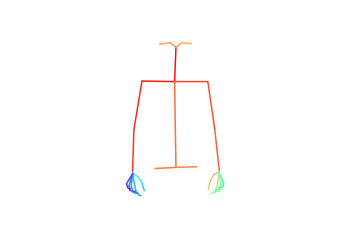

1


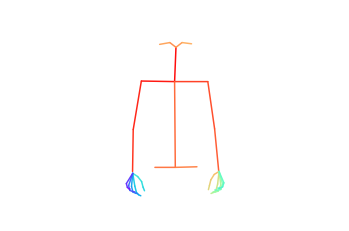

2


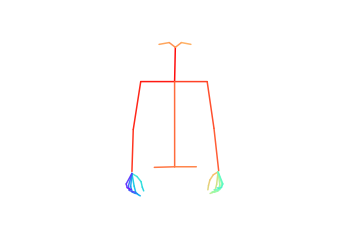

3


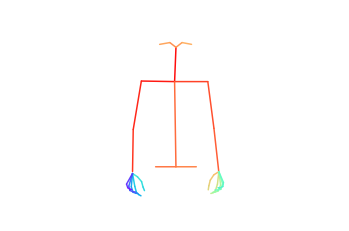

4


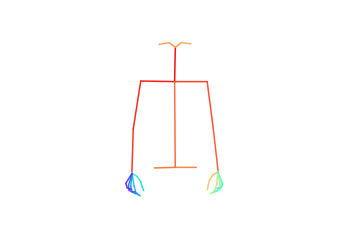

5


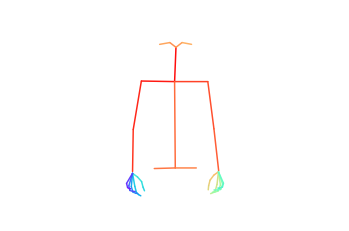

6


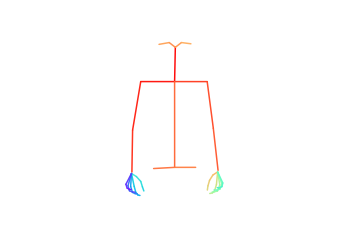

7


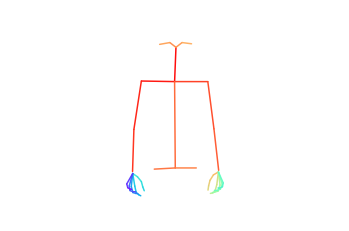

8


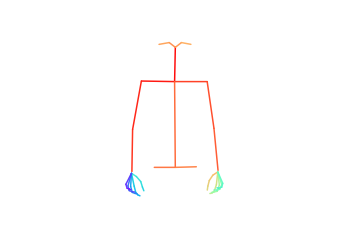

9


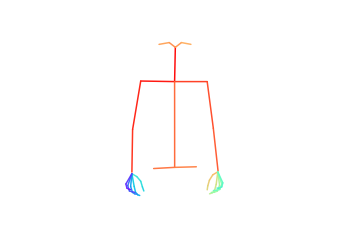

10


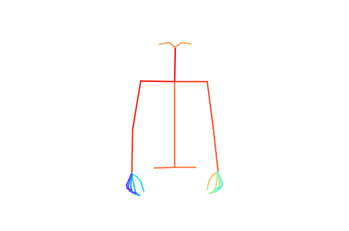

11


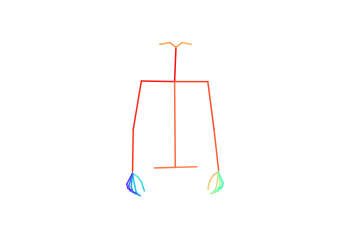

12


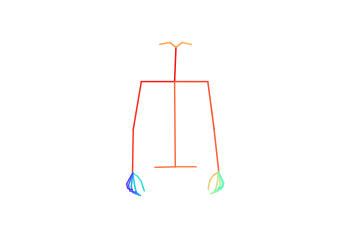

13


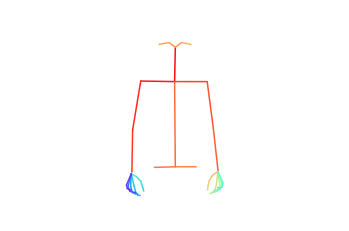

14


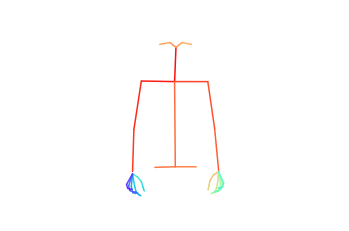

15


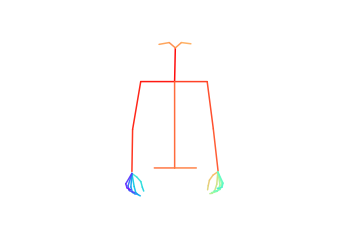

16


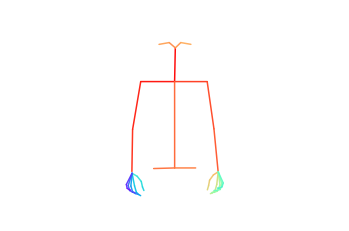

17


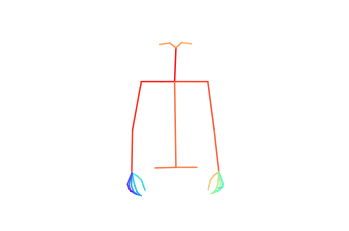

18


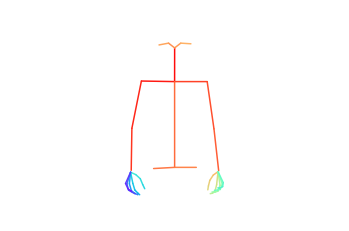

19


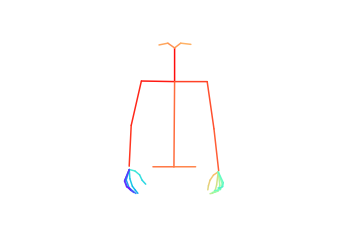

20


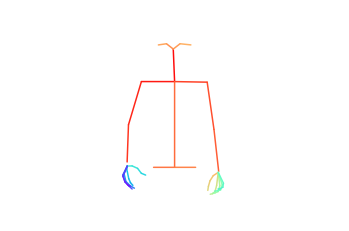

21


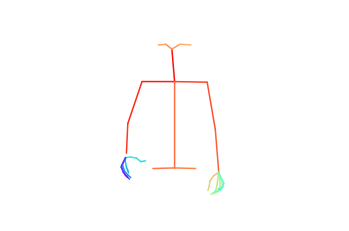

22


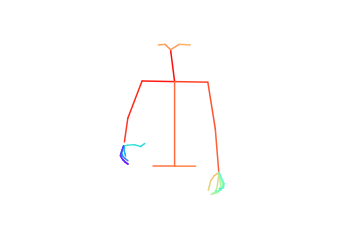

23


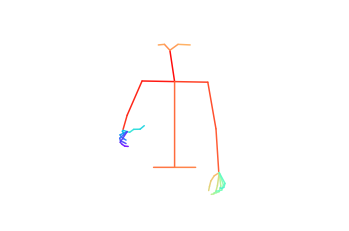

24


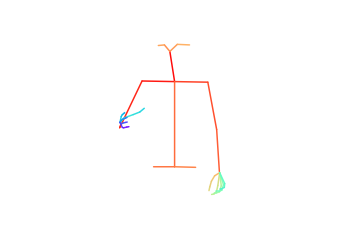

25


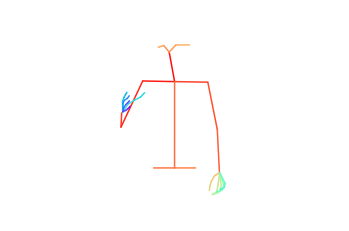

26


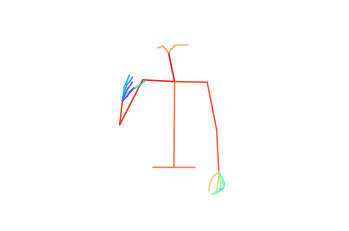

27


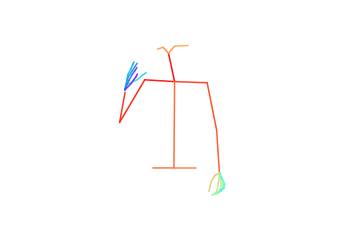

28


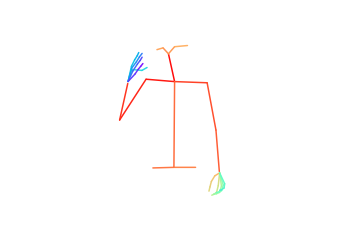

29


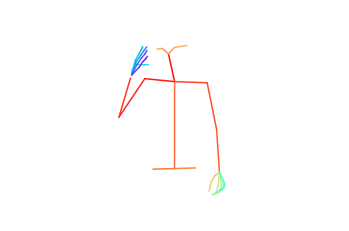

30


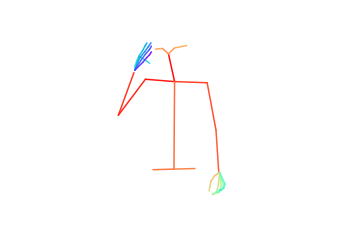

31


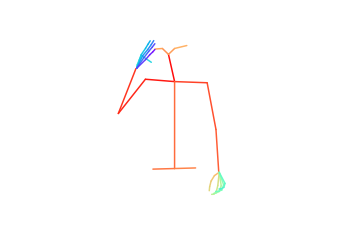

32


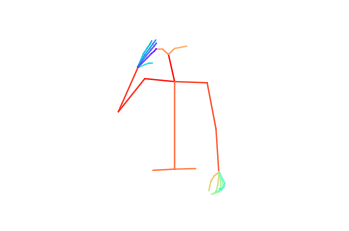

33


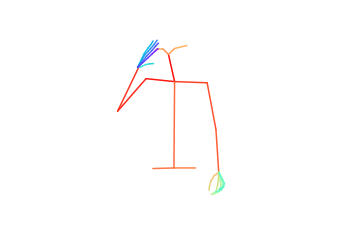

34


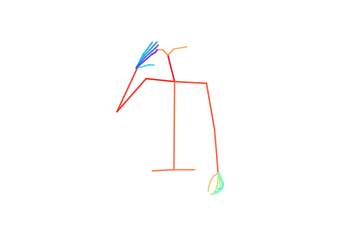

35


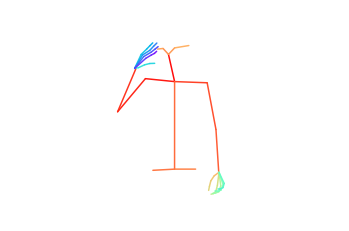

36


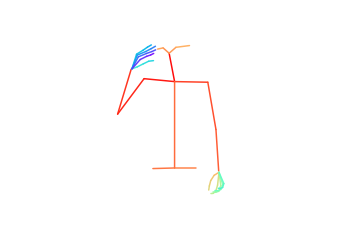

37


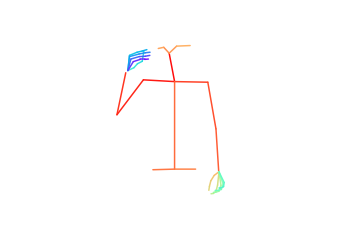

38


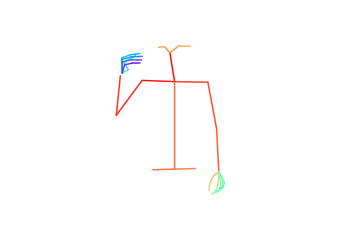

39


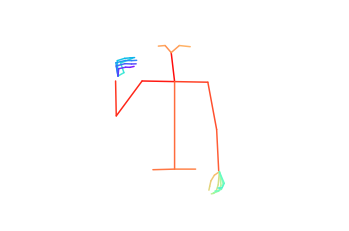

40


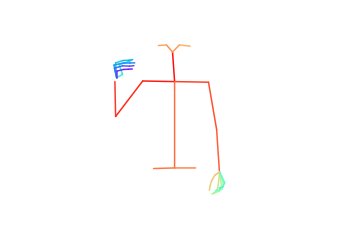

41


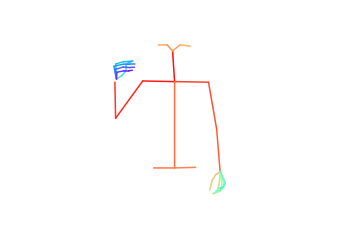

42


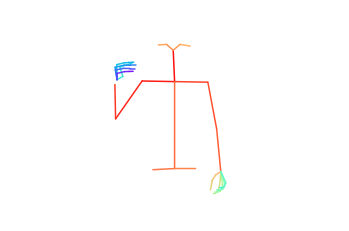

43


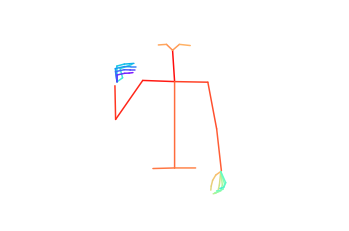

44


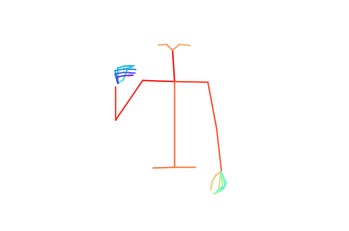

45


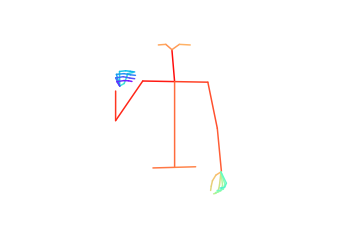

46


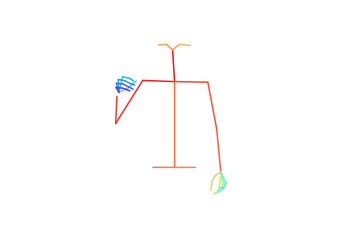

47


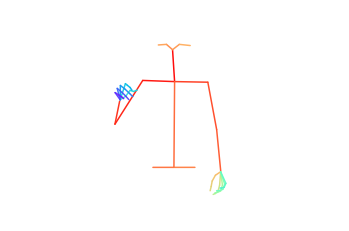

48


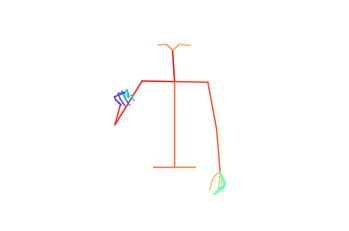

49


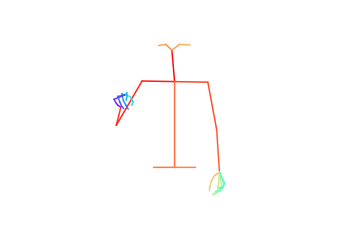

50


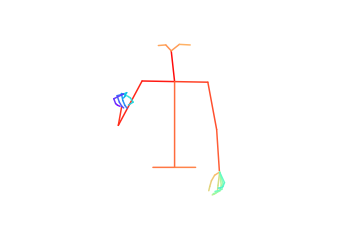

51


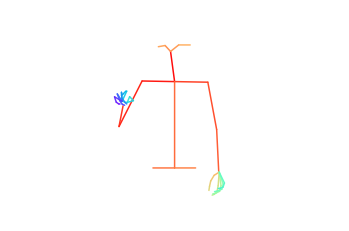

52


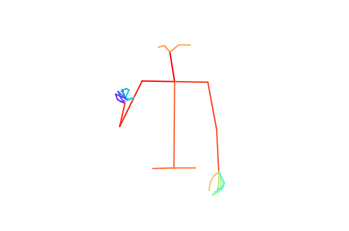

53


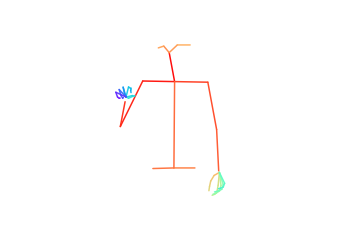

54


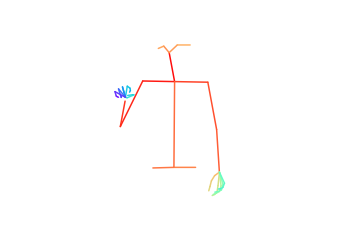

55


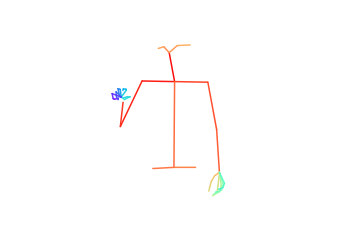

56


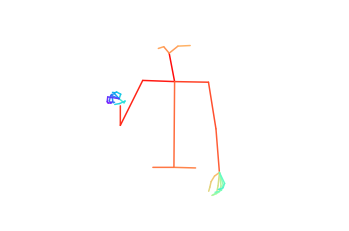

57


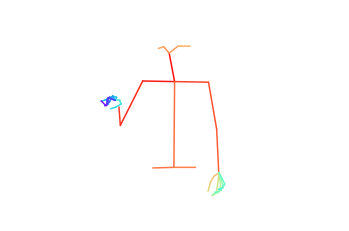

58


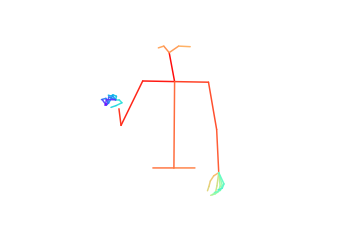

59


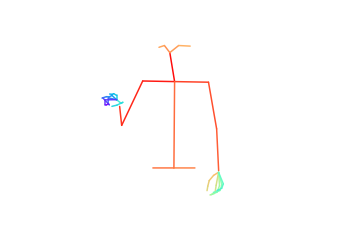

60


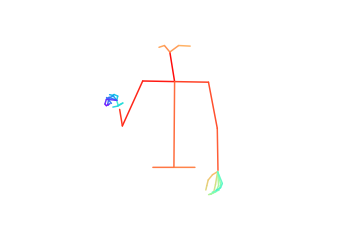

61


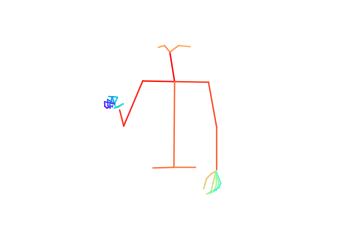

62


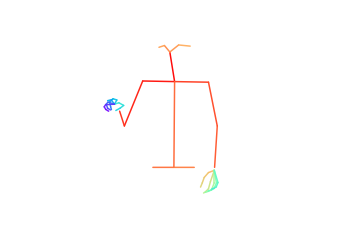

63


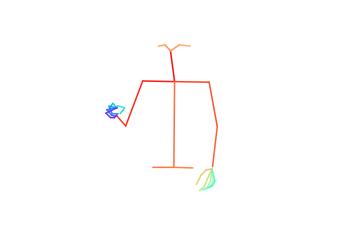

64


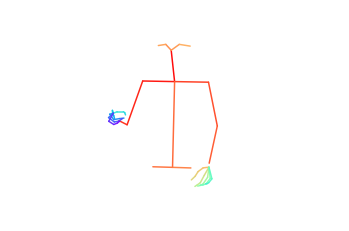

65


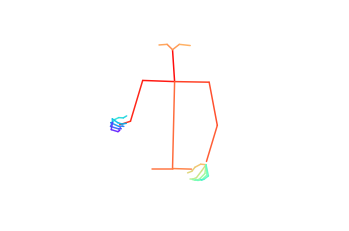

66


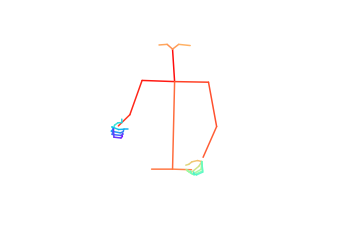

67


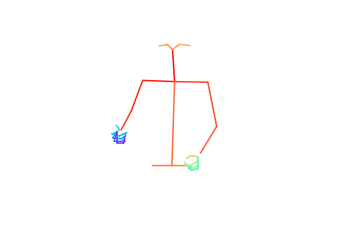

68


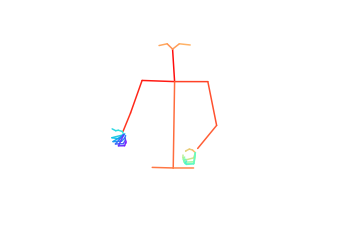

69


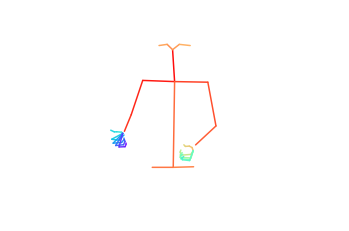

70


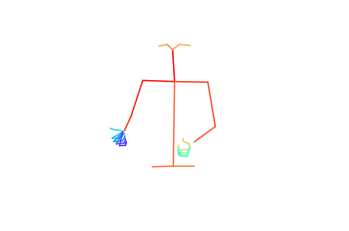

71


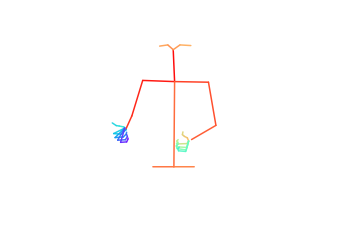

72


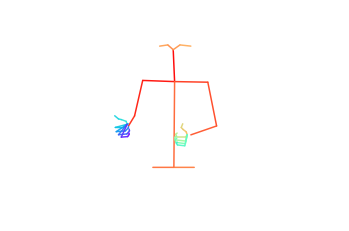

73


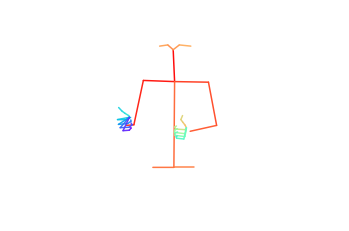

74


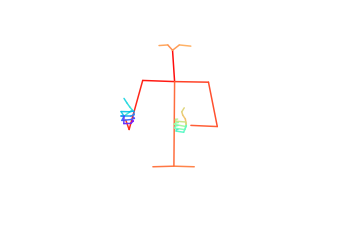

75


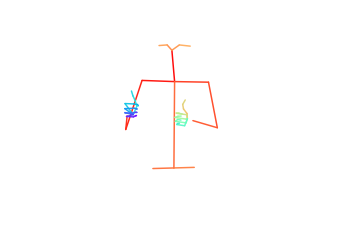

76


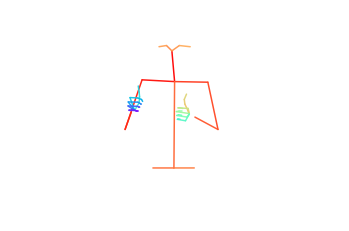

77


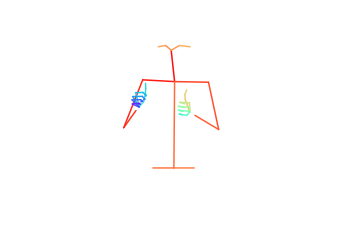

78


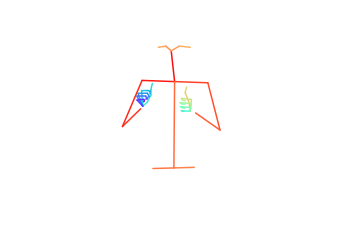

79


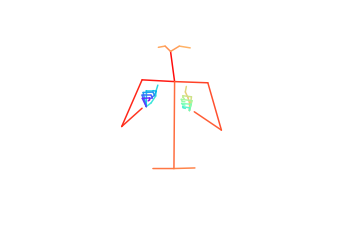

80


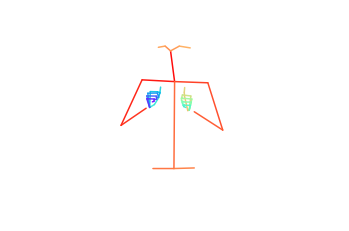

81


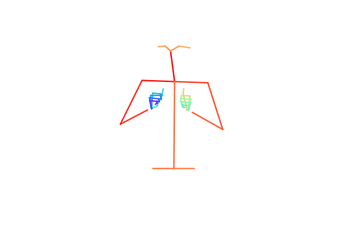

82


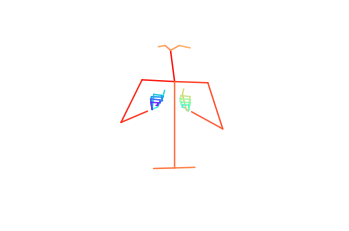

83


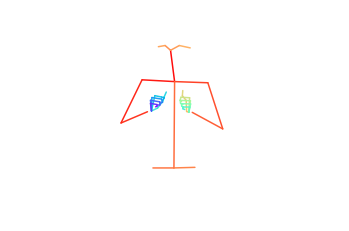

84


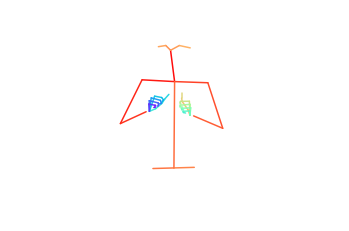

85


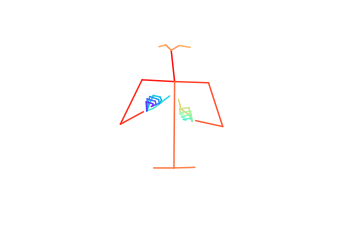

86


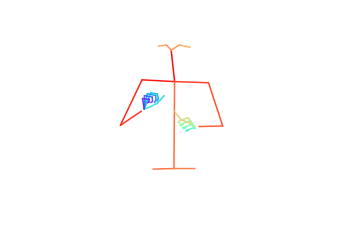

87


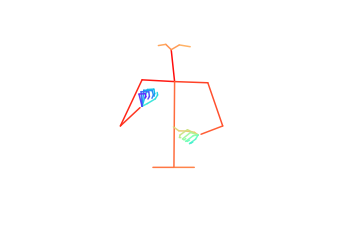

88


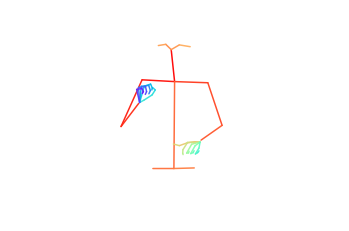

89


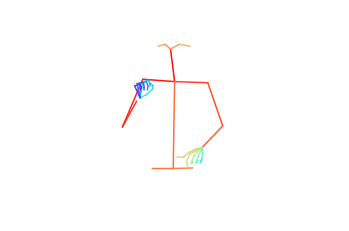

90


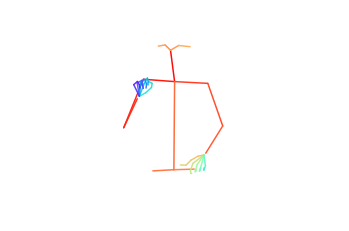

91


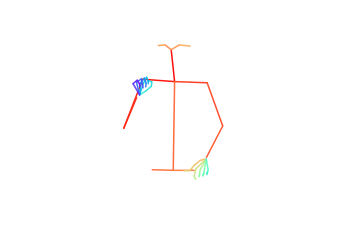

92


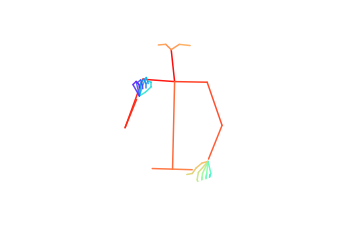

93


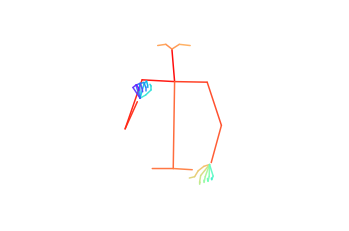

94


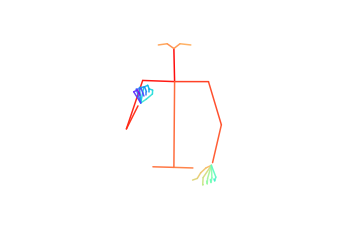

95


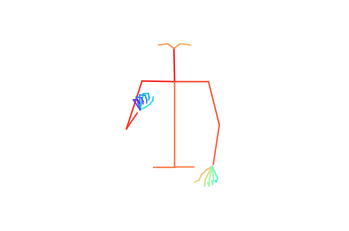

96


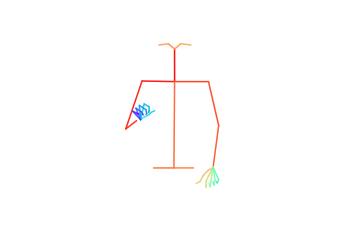

97


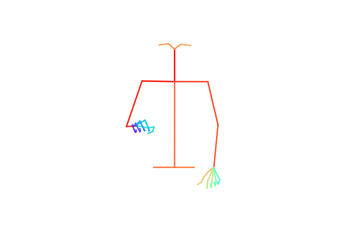

98


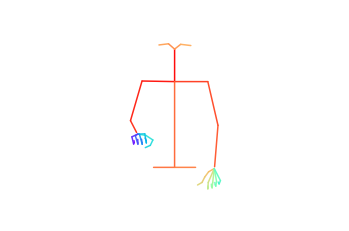

99


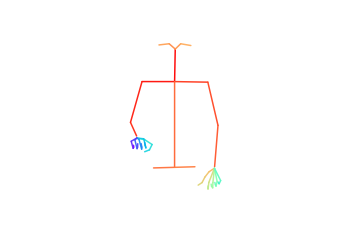

100


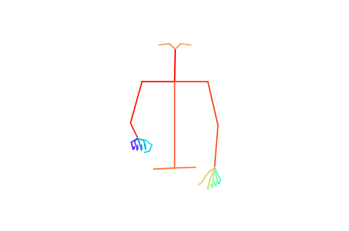

101


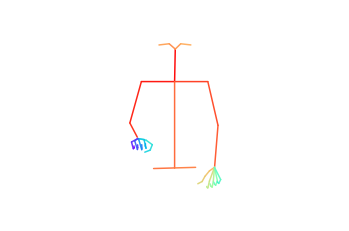

102


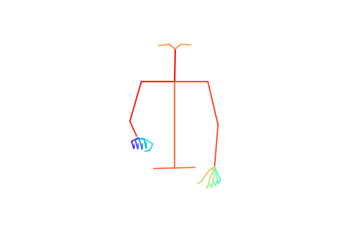

103


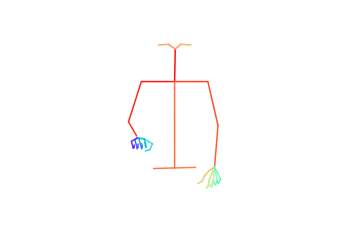

104


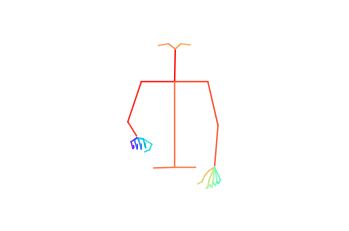

105


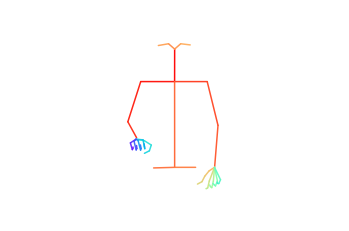

106


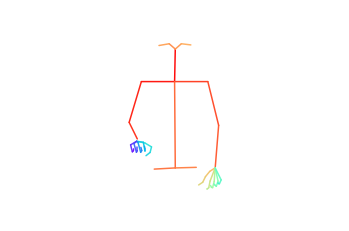

107


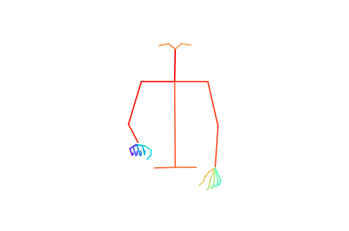

108


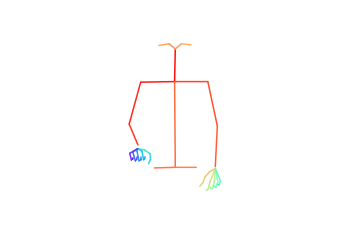

109


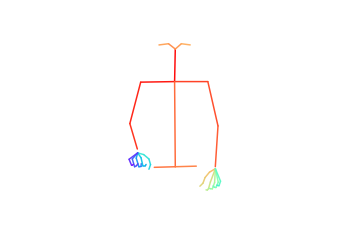

110


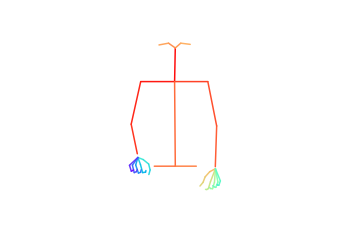

111


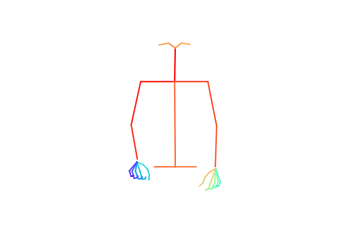

112


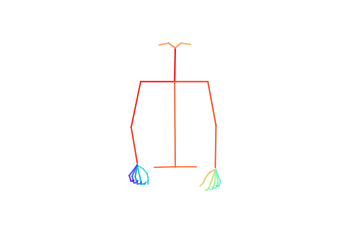

113


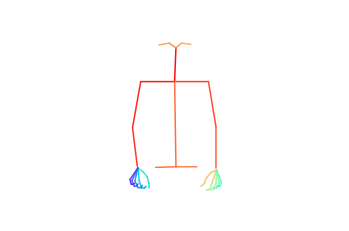

114


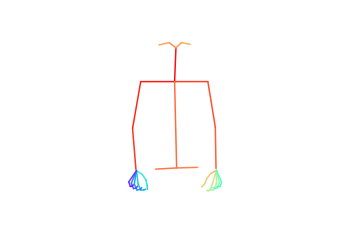

115


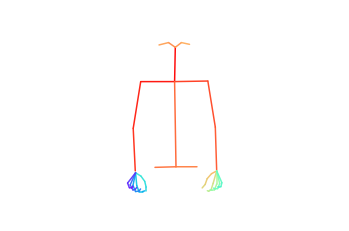

116


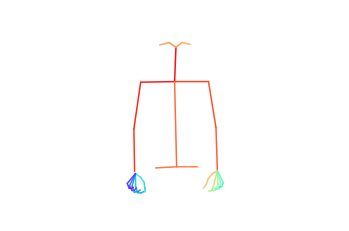

117


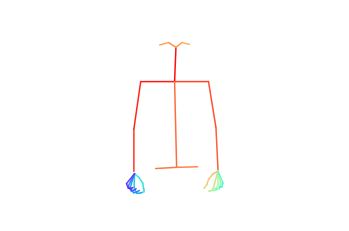

118


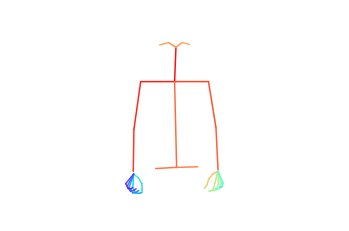

119


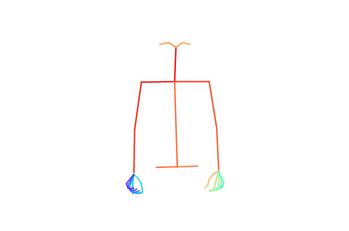

120


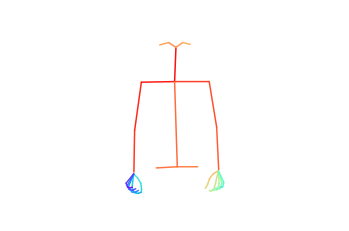

121


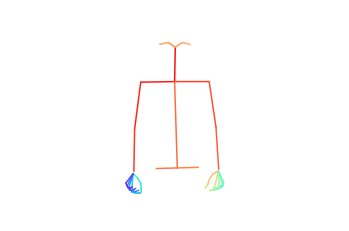

122


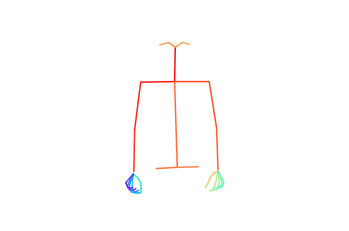

123


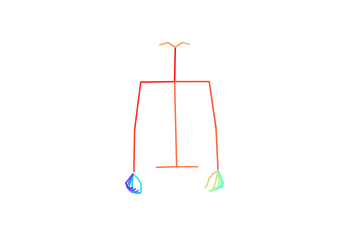

124


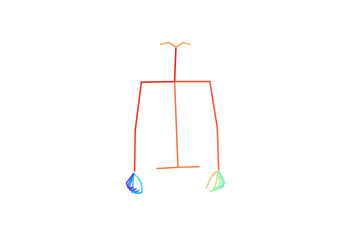

125


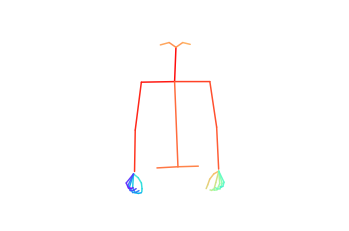

126


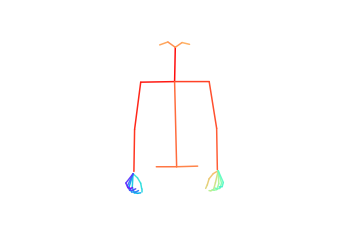

127


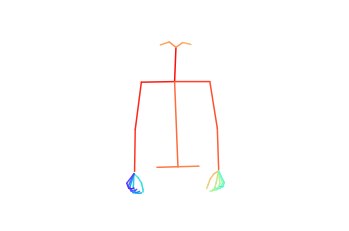

128


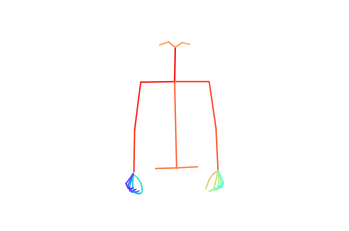

129


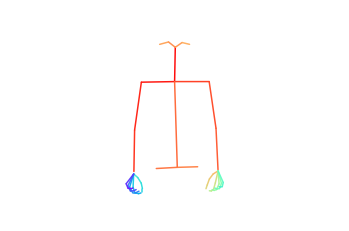

130


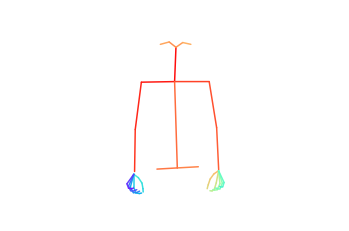

131


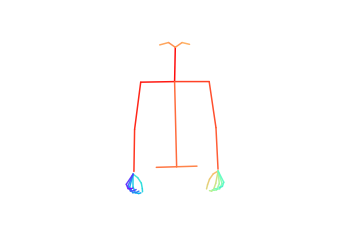

132


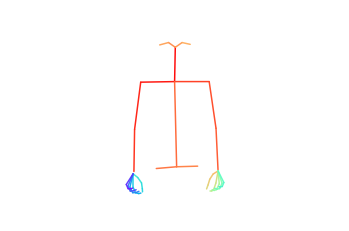

133


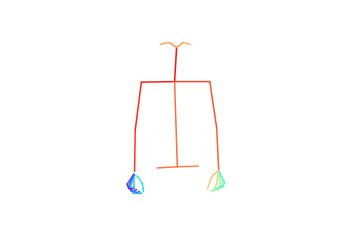

134


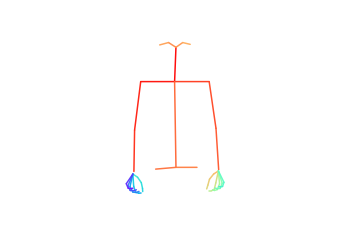

135


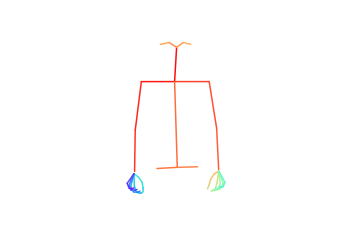

136


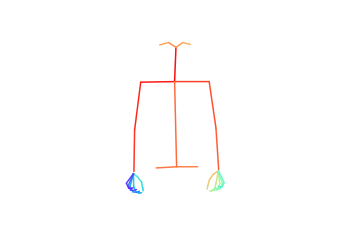

137


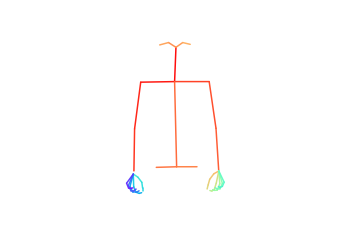

138


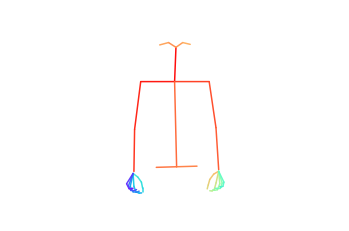

139


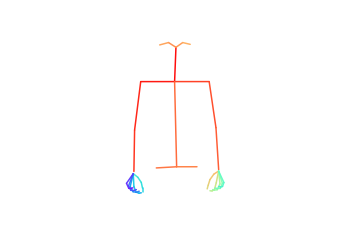

140


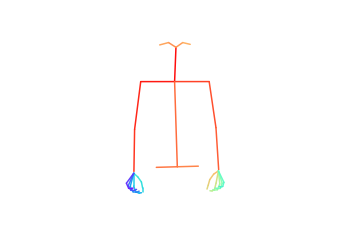

141


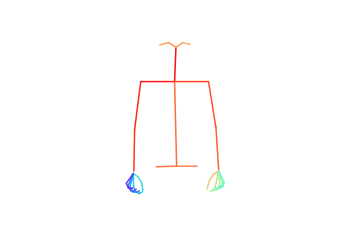

142


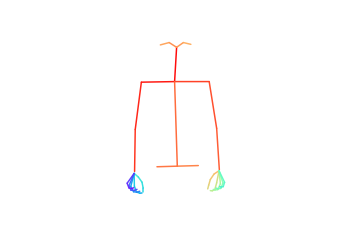

143


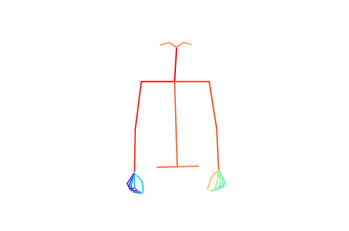

144


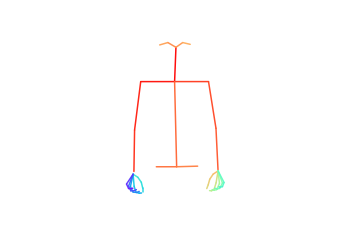

145


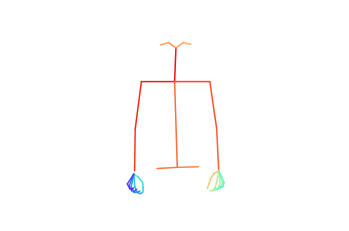

146


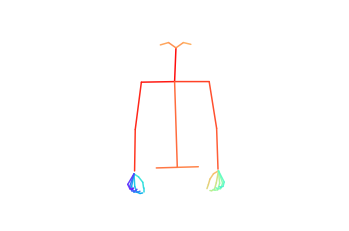

147


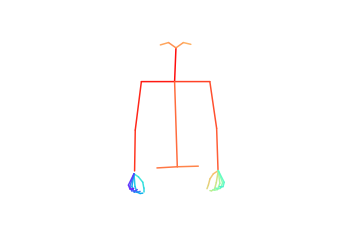

148


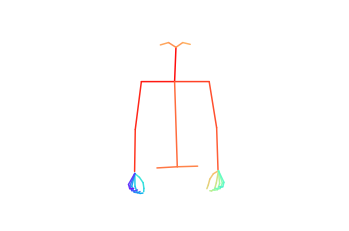

149


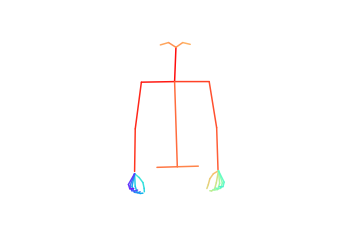

150


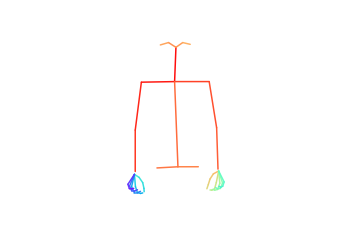

151


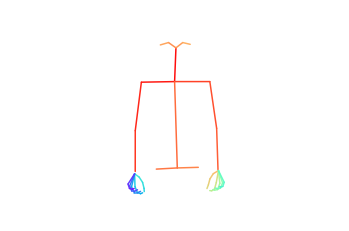

152


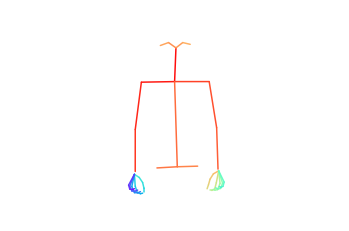

153


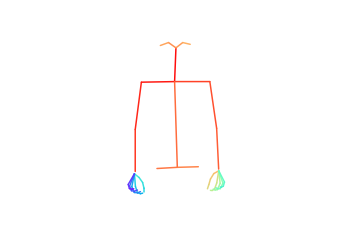

154


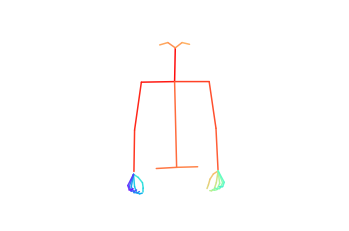

155


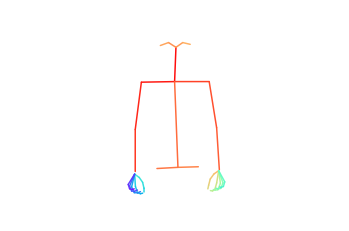

156


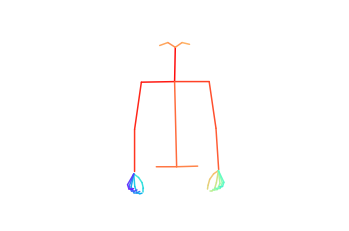

157


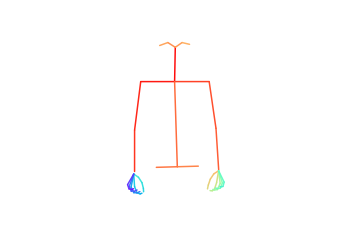

158


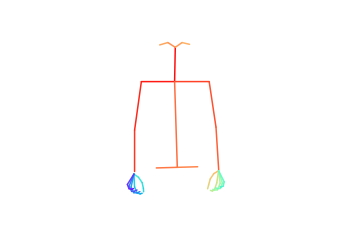

159


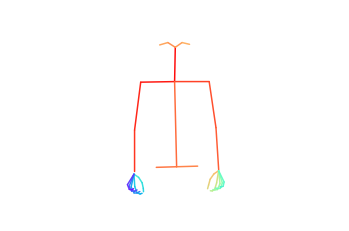

160


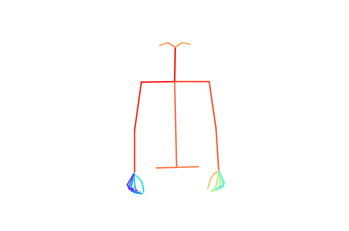

161


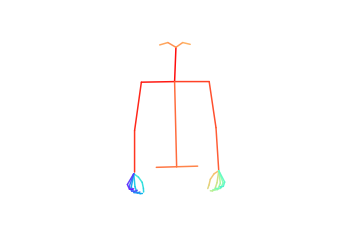

162


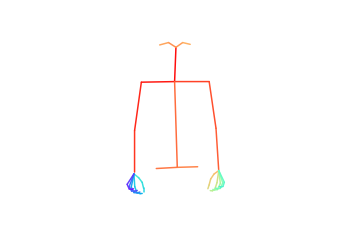

163


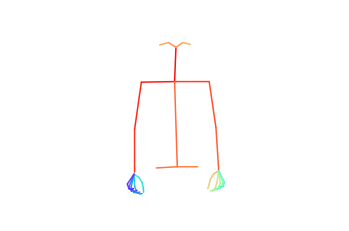

164


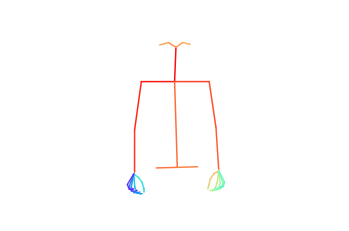

165


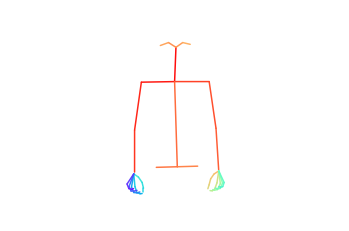

166


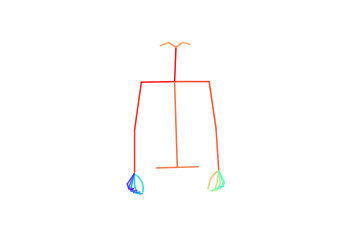

167


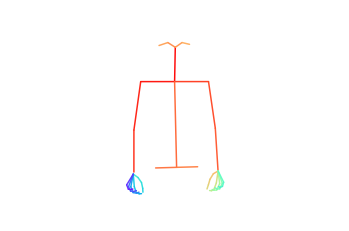

168


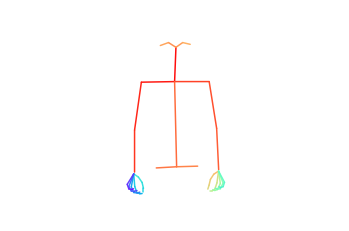

torch.Size([169, 3, 578, 776])
torch.Size([3, 578, 776])
0
torch.Size([3, 578, 776])
1
torch.Size([3, 578, 776])
2
torch.Size([3, 578, 776])
3
torch.Size([3, 578, 776])
4
torch.Size([3, 578, 776])
5
torch.Size([3, 578, 776])
6
torch.Size([3, 578, 776])
7
torch.Size([3, 578, 776])
8
torch.Size([3, 578, 776])
9
torch.Size([3, 578, 776])
10
torch.Size([3, 578, 776])
11
torch.Size([3, 578, 776])
12
torch.Size([3, 578, 776])
13
torch.Size([3, 578, 776])
14
torch.Size([3, 578, 776])
15
torch.Size([3, 578, 776])
16
torch.Size([3, 578, 776])
17
torch.Size([3, 578, 776])
18
torch.Size([3, 578, 776])
19
torch.Size([3, 578, 776])
20
torch.Size([3, 578, 776])
21
torch.Size([3, 578, 776])
22
torch.Size([3, 578, 776])
23
torch.Size([3, 578, 776])
24
torch.Size([3, 578, 776])
25
torch.Size([3, 578, 776])
26
torch.Size([3, 578, 776])
27
torch.Size([3, 578, 776])
28
torch.Size([3, 578, 776])
29
torch.Size([3, 578, 776])
30
torch.Size([3, 578, 776])
31
torch.Size([3, 578, 776])
32
torch.Size([3, 578, 77

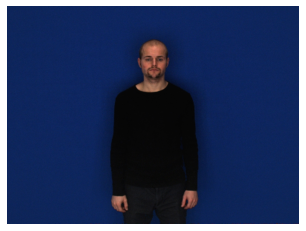

done
6


In [36]:
from utils.skel import TB_vis_pose2D_GT
for i, data in enumerate(test_loader):
    print(i)
    if i == 6:
        break
    img_seq = torch.FloatTensor(data['img_seq'])
    pose_seq = data['pose_seq'].to(device)
    label_seq = data['label_seq'].to(device)
    transl_eng = data['transl_eng']
    transl_deu = data['transl_deu']
    multilingual = data['multi']
    img_seq_len = data['seq_len']

    total_sequence = sum(np.array(img_seq_len))
    delta = label_seq - pose_seq
    
    
    %matplotlib inline
    normalize_poses = True
    
    packed_img = dataset.pack_sequence(img_seq, np.array(img_seq_len))
    
    packed = dataset.pack_sequence(pose_seq, np.array(img_seq_len))
    packed_gt = dataset.pack_sequence(label_seq, np.array(img_seq_len))
    
    vis_pose, vis_gt, len_pose, len_gt = prep_poses(packed, packed_gt, num_joints=57, joint_dim=2, normalize=True)
#     print(vis_gt.shape)
    
    if i == 5:
        for k, pose in enumerate(vis_pose):
            fig = plt.figure()
        #     clear_output(wait=True)
            print(k)
            ax = plt.subplot(111)
    #         pose = skel.denormalize_pose(pose, test_dataset.mean, test_dataset.std)
    #         pose_gt = skel.denormalize_pose(vis_gt[i], test_dataset.mean, test_dataset.std)

        #     print(pose.shape)
    #         skel.plot_pose2D(ax, pose)
            skel.plot_pose2D(ax, pose, colormap='rainbow', gt=False, linewidth=1.5)
            ax.axis('off')
            plt.show()
            fig.savefig('figures/final_presentation/{}.jpg'.format(k), bbox_inches='tight', dpi=200)

        ims = []
        fig = plt.figure()
        plt.axis('off')
        print(packed_img.data.shape)
        for k, temp_img in enumerate(packed_img.data):
#             fig = plt.figure()
            print(temp_img.shape)
        #     clear_output(wait=True)
            print(k)
#             ax = plt.subplot(111)
            im = plt.imshow(temp_img.permute(1,2,0))
            ims.append([im])
            
            
#             plt.show()
#             fig.savefig('figures/final_presentation/img-{}.jpg'.format(k), bbox_inches='tight', dpi=200)   

        ani = animation.ArtistAnimation(fig, ims, interval=33, blit=True)  
        ani.save('figures/img-animation.gif', writer='imagemagick', fps=30)
        plt.show()
        
        print('done')

In [37]:
import matplotlib.animation as animation
import matplotlib.image as mpimg

figures/final_presentation/0.jpg
figures/final_presentation/1.jpg
figures/final_presentation/2.jpg
figures/final_presentation/3.jpg
figures/final_presentation/4.jpg
figures/final_presentation/5.jpg
figures/final_presentation/6.jpg
figures/final_presentation/7.jpg
figures/final_presentation/8.jpg
figures/final_presentation/9.jpg
figures/final_presentation/10.jpg
figures/final_presentation/11.jpg
figures/final_presentation/12.jpg
figures/final_presentation/13.jpg
figures/final_presentation/14.jpg
figures/final_presentation/15.jpg
figures/final_presentation/16.jpg
figures/final_presentation/17.jpg
figures/final_presentation/18.jpg
figures/final_presentation/19.jpg
figures/final_presentation/20.jpg
figures/final_presentation/21.jpg
figures/final_presentation/22.jpg
figures/final_presentation/23.jpg
figures/final_presentation/24.jpg
figures/final_presentation/25.jpg
figures/final_presentation/26.jpg
figures/final_presentation/27.jpg
figures/final_presentation/28.jpg
figures/final_presentati

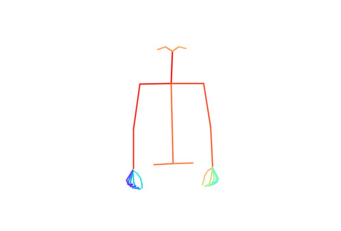

In [38]:
fig = plt.figure()
plt.axis('off')
ims = []
for i in range(169):
    print('figures/final_presentation/{}.jpg'.format(str(i)))
    img = mpimg.imread('figures/final_presentation/{}.jpg'.format(str(i)))
    im = plt.imshow(img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=33, blit=True)  
ani.save('figures/pose-animation.gif', writer='imagemagick', fps=30)
print('done')